# Accessing FAO WaPOR data

In this exercise we look into downloading Precipitation, Evapotranspiration and biomass production data for a region from the global WaPOR database.

More information on WaPOR: https://www.fao.org/in-action/remote-sensing-for-water-productivity/project/en

WaPOR data portal: https://data.apps.fao.org/wapor/?lang=en

Before we start, we need to install some required python packages.

In [ ]:
!pip install rasterio

The following cell ensures a correct download of the data from Google Cloud Storage.

In [1]:
import os
os.environ['GS_NO_SIGN_REQUEST'] = 'YES'

In [2]:
# Available data in WaPOR v3:

import pandas as pd
from vito_agri_tutorials.fao.wapor import WAPOR3_SUPPORTED_VARIABLES

df_vars = pd.DataFrame.from_dict(WAPOR3_SUPPORTED_VARIABLES)
df_vars = df_vars.transpose()
df_vars

,long_name,units
L1-AETI-A,Actual EvapoTranspiration and Interception,mm/year
L1-AETI-D,Actual EvapoTranspiration and Interception,mm/day
L1-AETI-M,Actual EvapoTranspiration and Interception,mm/month
L1-E-A,Evaporation,mm/year
L1-E-D,Evaporation,mm/day
L1-GBWP-A,Gross Biomass Water Productivity,kg/m³
L1-I-A,Interception,mm/year
L1-I-D,Interception,mm/day
L1-NBWP-A,Net Biomass Water Productivity,kg/m³
L1-NPP-D,Net Primary Production,gC/m²/day


In [1]:
# Get your polygon of interest based on the previous exercise

# NOTE: To be able to request PCP data, your polygon needs to cover at least one 5x5 km grid cell.

from pathlib import Path
import geopandas as gpd

in_dir = Path('./results/asis')
infile = in_dir / 'polygon_wapor.gpkg'
gdf = gpd.read_file(infile)
gdf

## OR use the following code to draw a polygon on the map
# from vito_agri_tutorials.utils.map import ui_map
# map = ui_map(geometry_type='polygon')
## Execute this in a next cell
# gdf = map.get_objects()
 

,id,geometry
0,test,"POLYGON ((26.46703 -16.42277, 26.51873 -16.422..."


Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-PCP-D/WAPOR-3.L1-PCP-D.2022-01-D1.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-PCP-D/WAPOR-3.L1-PCP-D.2022-01-D2.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-PCP-D/WAPOR-3.L1-PCP-D.2022-01-D3.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-PCP-D/WAPOR-3.L1-PCP-D.2022-02-D1.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-PCP-D/WAPOR-3.L1-PCP-D.2022-02-D2.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-PCP-D/WAPOR-3.L1-PCP-D.2022-02-D3.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-PCP-D/WAPOR-3.L1-PCP-D.2022-03-D1.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-PCP-D/WAPOR-3.L1-PCP-D.2022-03-D2.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-PCP-D/WAPOR-3.L1-PCP-D.2022-03-D3.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-PCP-D/WA

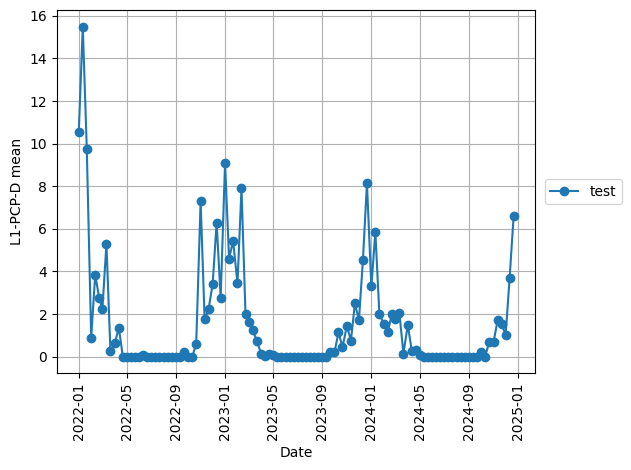

In [ ]:
# Get precipitation data for the polygon

#NOTE: PCP data comes in its original resolution of 5 km x 5 km grid cells.

from vito_agri_tutorials.fao.wapor import extract_wapor_data, compute_area_stats, plot_stats

out_dir = Path('./results/wapor')

variable = "L1-PCP-D"
start_date = '2022-01-01'
end_date = '2024-12-31'
write_tif = True

pcp = extract_wapor_data(variable,
                         gdf,
    out_dir,
    start_date,
    end_date=end_date,
    write_tif=write_tif,
    debug=True,)

pcp_stats = compute_area_stats(pcp)
pcp_mean = plot_stats(pcp_stats, variable, "mean")


Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-AETI-D/WAPOR-3.L1-AETI-D.2022-01-D1.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-AETI-D/WAPOR-3.L1-AETI-D.2022-01-D2.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-AETI-D/WAPOR-3.L1-AETI-D.2022-01-D3.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-AETI-D/WAPOR-3.L1-AETI-D.2022-02-D1.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-AETI-D/WAPOR-3.L1-AETI-D.2022-02-D2.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-AETI-D/WAPOR-3.L1-AETI-D.2022-02-D3.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-AETI-D/WAPOR-3.L1-AETI-D.2022-03-D1.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-AETI-D/WAPOR-3.L1-AETI-D.2022-03-D2.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/MAPSET/L1-AETI-D/WAPOR-3.L1-AETI-D.2022-03-D3.tif
Reading file gs://fao-gismgr-wapor-3-data/DATA/WAPOR-3/

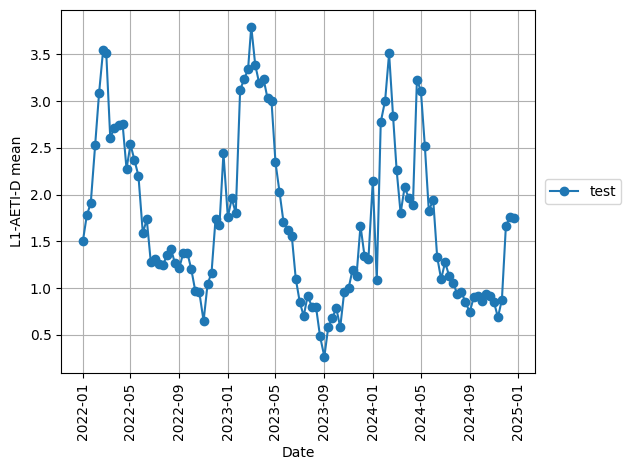

In [7]:
# Get AETI data for the polygon

from vito_agri_tutorials.fao.wapor import extract_wapor_data, compute_area_stats, plot_stats

out_dir = Path('./results/wapor')

variable = "L1-AETI-D"
start_date = '2022-01-01'
end_date = '2024-12-31'
write_tif = True

aeti = extract_wapor_data(variable,
                         gdf,
    out_dir,
    start_date,
    end_date=end_date,
    write_tif=write_tif,
    debug=True,)

aeti_stats = compute_area_stats(aeti)
aeti_mean = plot_stats(aeti_stats, variable, "mean")

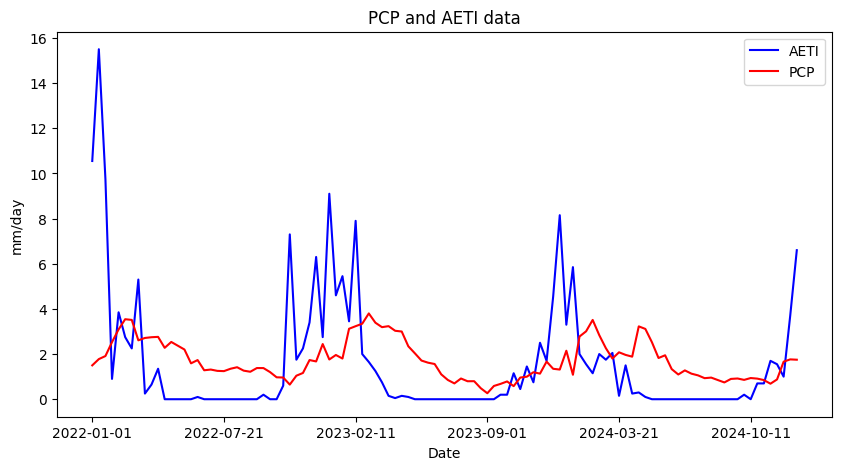

In [ ]:
# Plot PCP and AETI data together

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(10, 5))
pcp_mean.plot(ax=ax, label='PCP', color='blue', kind='line')
aeti_mean.plot(ax=ax, label='AETI', color='red', kind='line')
plt.title('PCP and AETI data')
ax.set_xlabel('Date')
ax.set_ylabel('mm/day')
ax.legend(labels=['AETI', 'PCP'])
plt.show()

# Now also try plotting the NPP timeseries in green on the same plot...

In [2]:
# Get total biomass production data for the polygon

from vito_agri_tutorials.fao.wapor import extract_wapor_data, compute_area_stats, plot_stats

out_dir = Path('./results/wapor')

variable = "L1-TBP-A"
start_date = '2022-01-01'
end_date = '2024-12-31'
write_tif = True

tbp = extract_wapor_data(variable,
                         gdf,
    out_dir,
    start_date,
    end_date=end_date,
    write_tif=write_tif,
    debug=True,)

tbp_stats = compute_area_stats(tbp)
tbp_mean = plot_stats(tbp_stats, variable, "mean", plot=False)

File results/wapor/test/WAPOR-3.L1-TBP-A.2022.tif already exists
File results/wapor/test/WAPOR-3.L1-TBP-A.2023.tif already exists
File results/wapor/test/WAPOR-3.L1-TBP-A.2024.tif already exists


Text(0, 0.5, 'kg/ha')

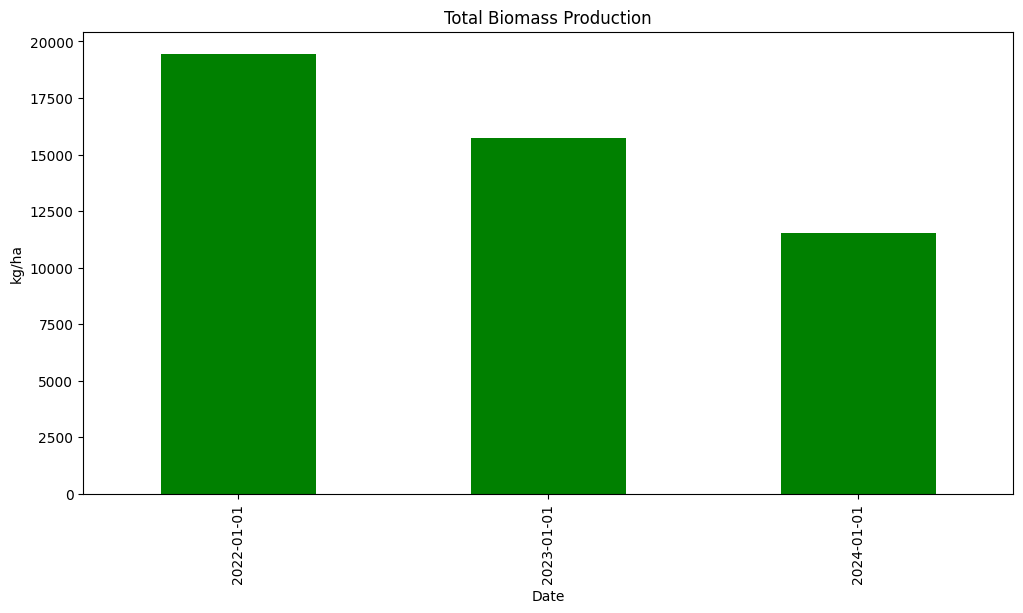

In [3]:
from matplotlib import pyplot as plt

figs, ax = plt.subplots(1, figsize=(12, 6))

tbp_mean['test'].plot.bar(ax=ax, label='TBP', color='green')
plt.title('Total Biomass Production')
ax.set_xlabel('Date')
ax.set_ylabel('kg/ha')
